The goal of this assignment is to predict the price based off the other variables in the dataset. 

In [113]:
#Necessary libraries to perform eda, datapreprocessing and linear regression 
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error

I loaded the monet csv and then transformed the dataset into a pandas dataframe. Next I displayed the first 5 rows, to get a sense of what the dataset looks like. 

In [114]:
#retrieve data
monet = "C:/Users/dgmur/OneDrive/Desktop/INFO 5505/monet.csv"
#transform csv into dataframe
monet_df = pd.read_csv(monet)

#display first 5 rows 
monet_df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


I looked at the data types of each column in Monet and the dimensions of the dataset. There are 3 floating point columns and 3 integer columns. Also, there are 430 observations and 6 total columns.

In [115]:
#display information about the monet 
monet_df.info()

#display the shape of monet 
monet_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


(430, 6)

I checked if there are any missing values in each of the columns. For this dataset, there are none. 

In [116]:
#check for missing values just in case
monet_df.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

6 histograms are displayed to check the distribution of each column. Price, height and width showed skewedness, and picture, signed, and house seem to be discrete variables. 

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'HEIGHT'}>],
       [<Axes: title={'center': 'WIDTH'}>,
        <Axes: title={'center': 'SIGNED'}>],
       [<Axes: title={'center': 'PICTURE'}>,
        <Axes: title={'center': 'HOUSE '}>]], dtype=object)

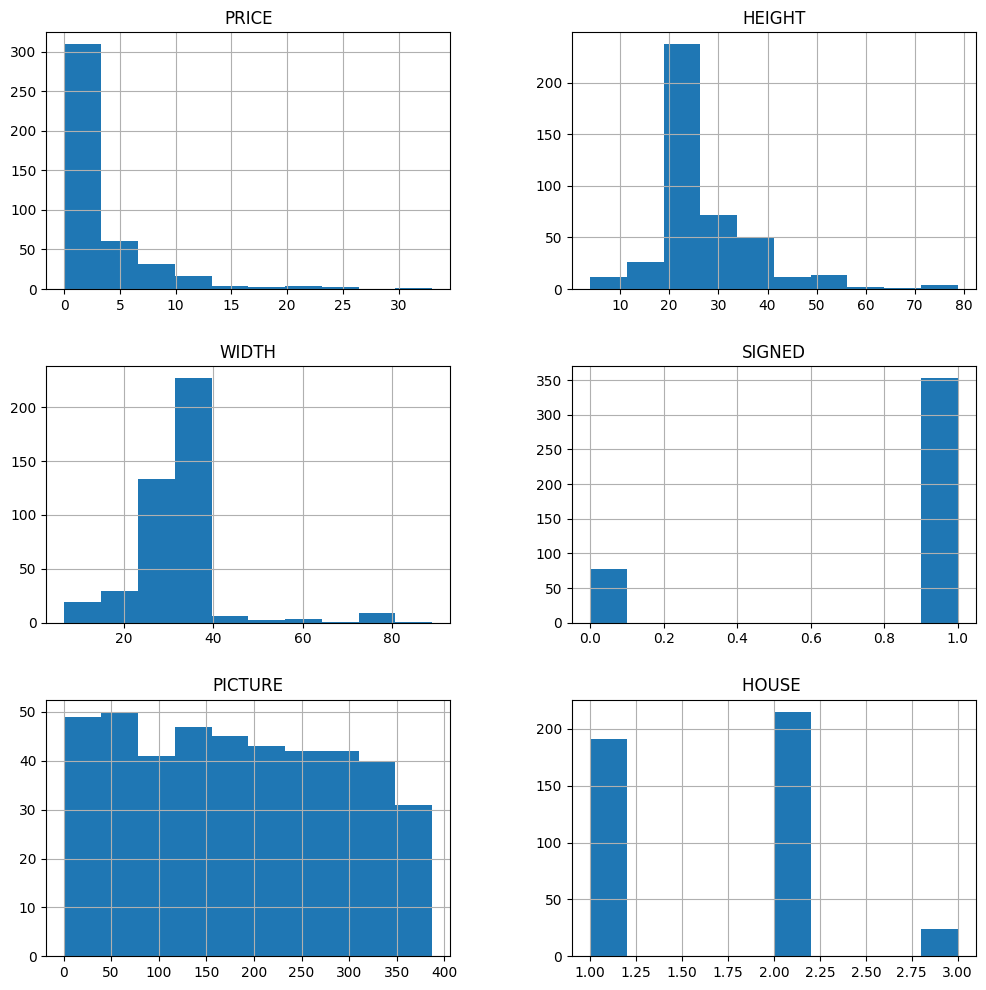

In [117]:
#check distribution of variables for monet csv
monet_df.hist(figsize = (12,12))

A scatterplot matrix is used to help us visualize the relationship of each column in the monet dataset. 
It looks the variables have a either a weak strong relationship with each other, or they don't have any relationship at all. 

array([[<Axes: xlabel='PRICE', ylabel='PRICE'>,
        <Axes: xlabel='HEIGHT', ylabel='PRICE'>,
        <Axes: xlabel='WIDTH', ylabel='PRICE'>,
        <Axes: xlabel='SIGNED', ylabel='PRICE'>,
        <Axes: xlabel='PICTURE', ylabel='PRICE'>,
        <Axes: xlabel='HOUSE ', ylabel='PRICE'>],
       [<Axes: xlabel='PRICE', ylabel='HEIGHT'>,
        <Axes: xlabel='HEIGHT', ylabel='HEIGHT'>,
        <Axes: xlabel='WIDTH', ylabel='HEIGHT'>,
        <Axes: xlabel='SIGNED', ylabel='HEIGHT'>,
        <Axes: xlabel='PICTURE', ylabel='HEIGHT'>,
        <Axes: xlabel='HOUSE ', ylabel='HEIGHT'>],
       [<Axes: xlabel='PRICE', ylabel='WIDTH'>,
        <Axes: xlabel='HEIGHT', ylabel='WIDTH'>,
        <Axes: xlabel='WIDTH', ylabel='WIDTH'>,
        <Axes: xlabel='SIGNED', ylabel='WIDTH'>,
        <Axes: xlabel='PICTURE', ylabel='WIDTH'>,
        <Axes: xlabel='HOUSE ', ylabel='WIDTH'>],
       [<Axes: xlabel='PRICE', ylabel='SIGNED'>,
        <Axes: xlabel='HEIGHT', ylabel='SIGNED'>,
        <Axes

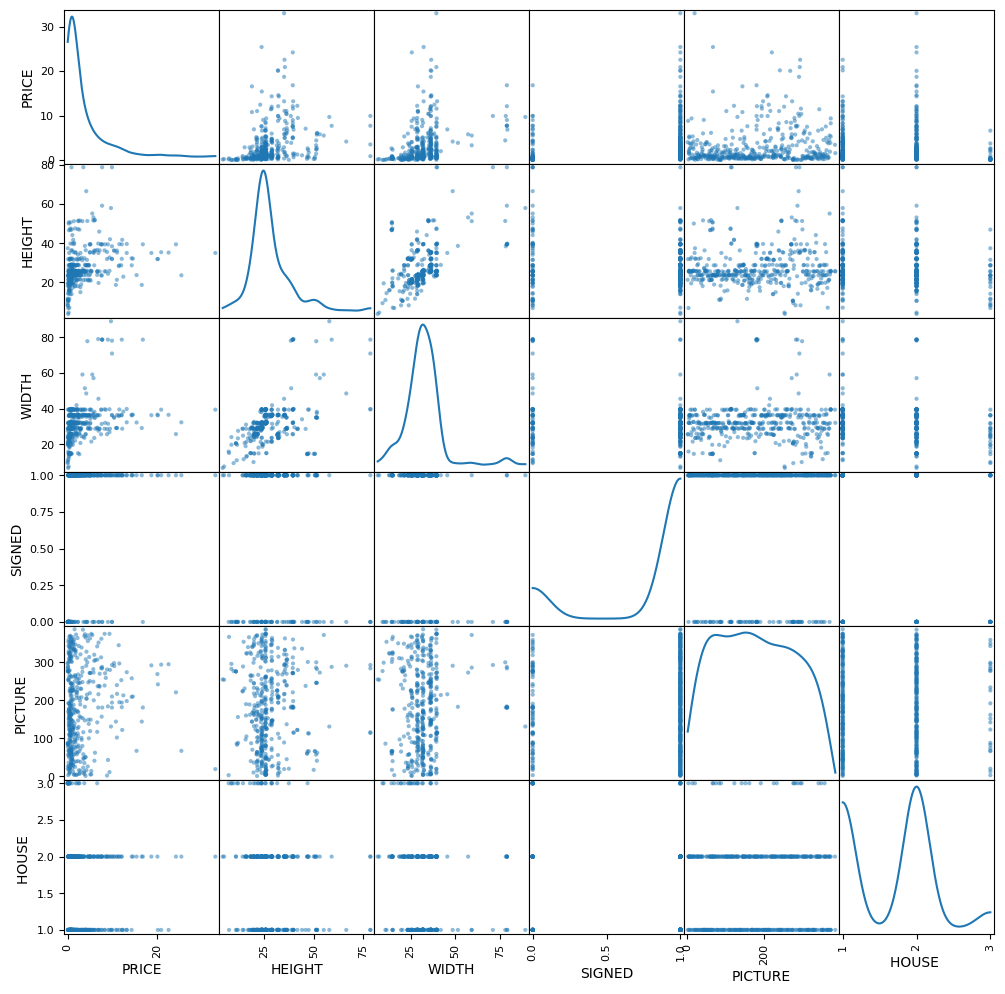

In [118]:
#display a scatter_matrix
scatter_matrix(monet_df, figsize = (12,12), diagonal = 'kde')

#width, price, and height are skewed

I decided to find the correlations for each column, to be able to quantify the relationship. Then displayed these results using a heatmap. Since, I am trying to predict the price, I focused the correlations for price. 

Height and Width have the strongest correlation in either direction, and house is the only column that is negatively correlated.

<Axes: >

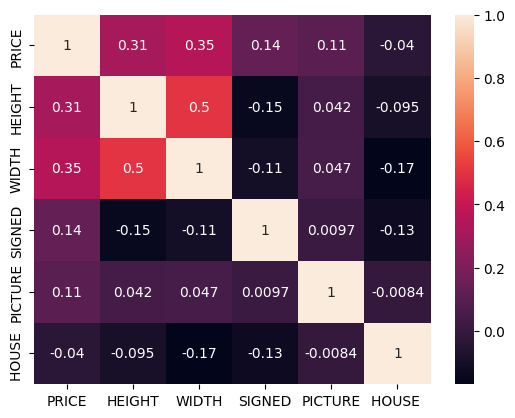

In [119]:
#Let's look at the correlations 
corr_monet = monet_df.corr()

sns.heatmap(corr_monet, annot = True)

I also decided to check the number of observations for each of class of the discrete variables, to see how many classes were in each column. I noticed that the picture column had over 375 classes, so I assumed this used for identification purposes. 

I decided to drop the picture column because I believed that it had to many classes for the model to be able generalize accurately. 

In [120]:
#Check the count of obersvations per class of the signed column 
print(monet_df['SIGNED'].value_counts())



SIGNED
1    353
0     77
Name: count, dtype: int64


In [121]:
#Check the count of obersvations per class of the HOUSE column 
print(monet_df['HOUSE '].value_counts())

HOUSE 
2    215
1    191
3     24
Name: count, dtype: int64


In [122]:
#Check the count of obersvations per class of the Picture column 
monet_df['PICTURE'].value_counts()

PICTURE
181    4
66     4
4      3
5      3
375    3
      ..
137    1
136    1
135    1
134    1
387    1
Name: count, Length: 376, dtype: int64

In [123]:
#create a df where the Picture variable is removed from the dataframe
ml_monet = monet_df.drop(columns=['PICTURE'])


ml_monet.head(10)

,PRICE,HEIGHT,WIDTH,SIGNED,HOUSE
0,3.993780,21.3,25.6,1,1
1,8.800000,31.9,25.6,1,2
2,0.131694,6.9,15.9,0,3
3,2.037500,25.7,32.0,1,2
4,1.487500,25.7,32.0,1,2
5,1.870000,25.6,31.9,1,1
6,5.282500,25.5,35.6,1,1
7,5.065750,26.0,34.3,1,2
8,1.375000,25.6,36.2,1,2
9,2.530000,25.6,36.4,1,2


The house column peaked my interest because it was the only column that showed negative correlation with price,and I wanted to know if there was a relationship between price and a specific class of the house column. 

I used one hot encoding to give in order to find the relationship of price on each class of house. 

In [124]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'HOUSE' column to perform one hot encoding
encd = encoder.fit_transform(ml_monet[['HOUSE ']])

#convert the one hot encoding into an array and then tranform that into a dataframe
encoded = pd.DataFrame(encd.toarray(), columns= encoder.get_feature_names_out(['HOUSE ']))
#add the one hot encoding to values of house with the ml_monet dataframe
ml_monet = pd.concat([ml_monet, encoded], axis=1)

In [125]:
#drop the house column 
ml_monet = ml_monet.drop(columns=['HOUSE '])


In [126]:
#check to see if house column from removed
ml_monet.head()


,PRICE,HEIGHT,WIDTH,SIGNED,HOUSE _1,HOUSE _2,HOUSE _3
0,3.993780,21.3,25.6,1,1.0,0.0,0.0
1,8.800000,31.9,25.6,1,0.0,1.0,0.0
2,0.131694,6.9,15.9,0,0.0,0.0,1.0
3,2.037500,25.7,32.0,1,0.0,1.0,0.0
4,1.487500,25.7,32.0,1,0.0,1.0,0.0


<Axes: >

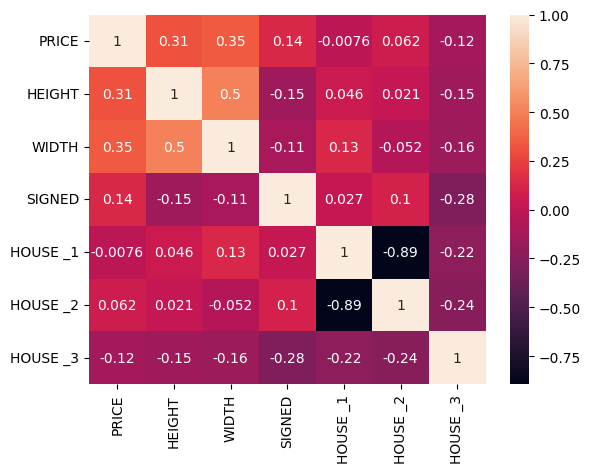

In [127]:
#compute correlation 
monet_corr2 = ml_monet.corr()
#display the correlation as a heatmap
sns.heatmap(monet_corr2, annot=True)

House_3 had the highest negative correlation out of the rest of the house classes. 

In this assigment, I decided that my columns/features of interest to perform linear regression was height, width and house 3. 

I wanted to visualize the relationship between price and house_3, and it shows that there is little to no correlation between them. 

<Axes: xlabel='HOUSE _3', ylabel='PRICE'>

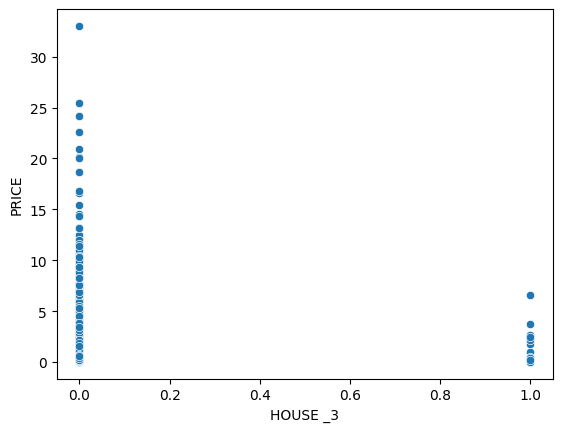

In [128]:
#display a scatterplot for House_3 and the price
sns.scatterplot(x=ml_monet['HOUSE _3'], y = ml_monet['PRICE'])

In [129]:
#convert the monet values into a numpy array 
array = ml_monet.values
#slice to only include predictors
all_x = array[:, 1:]
#slice to only include target variable, which is price
y = array[:,0]


In [130]:
#establish test size 
test_size = 0.20 
#establish the random seed for replicability purposes
seed = 7
#create a train test split 
x_train, x_test, y_train, y_test = train_test_split(all_x, y, test_size=test_size, 
                                                    random_state = seed)

I checked the shape of the training data to see number of observations and columns in the training dataset

In [131]:
#chekc the shape for the predictors and target variable for the training dataset
print(x_train.shape)
print(y_train.shape)

(344, 6)
(344,)


I fitted a linear regression model using the values of house_3 and price from the training dataset. 

In [154]:
#call the linear regression
model1 = LinearRegression()
#slice the x training to only include the values of House_3
house_2train = x_train[:,5]
#convert values into 2d array
house_2train = house_2train.reshape(-1,1)
#fit the linear regression model with the training data if house_3 and price
model1.fit(house_2train, y_train)

LinearRegression()

I predicted the corresponding y values using the linear regression model that I fitted. And then, I computed the rmse and the r-squared value. 

According to the r-square the value, the model performed extremely bad. And the according to the rmse the model performed bad as well. This expected because house_3 had a low correlation value. 

In [155]:
#find the predicted values of the target variable which is price
y_pred1 = model1.predict(x_test[:,5].reshape(-1,1))
#compute mean squared error
mse1 = mean_squared_error(y_test, y_pred1)
#find the square root of the mean square error to compute the rmse
rmse = np.sqrt(mse1)

#find the r-squared value 
print("R-squared:{}".format(model1.score(x_test[:,5].reshape(-1,1), y_test)))

print("RMSE:{}".format(rmse))


R-squared:0.021910992199022927
RMSE:3.2130724910445623


A regression line was displayed on the scatterplot, to see how will the regression line fitted visually. 

<Axes: >

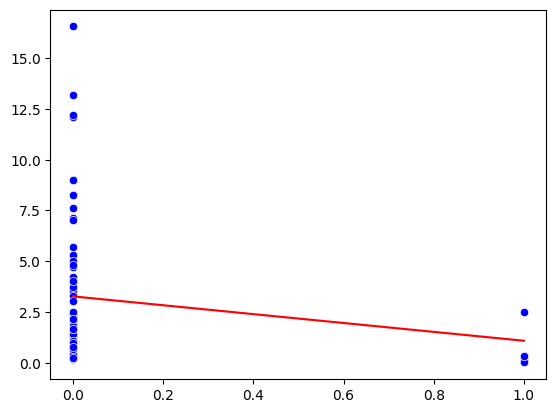

In [156]:
#display the regression line along the scatterplot
sns.scatterplot(x=x_test[:,5].reshape(-1), y = y_test, color = 'blue')
sns.lineplot(x=x_test[:,5].reshape(-1), y=y_pred1, color = 'red' )

I perform k-fold cross validation to validate, the model and see how well it performs based on different partitions of the data. 

In [157]:
#compute k fold cross validation for rmse 
num_fold = 10 

seed = 2

k_fold = KFold(n_splits=num_fold, random_state=seed, shuffle= True)

scoring = 'neg_root_mean_squared_error'

results = cross_val_score(model1, all_x[:,5].reshape(-1,1), y=y, scoring=scoring)
#find the average of all of the cross validation scores
cross_val_results = (results.mean())

print("cross val rmse score:{}".format(cross_val_results))

cross val rmse score:-4.242236447958422


The rmse score decreased. 

Height is the next variable I will be using predict price.

A scatterplot is used to display the relationship between height and price. According to the scatterplot, there a some signs of a slight relationship between height and price. 

<Axes: xlabel='HEIGHT', ylabel='PRICE'>

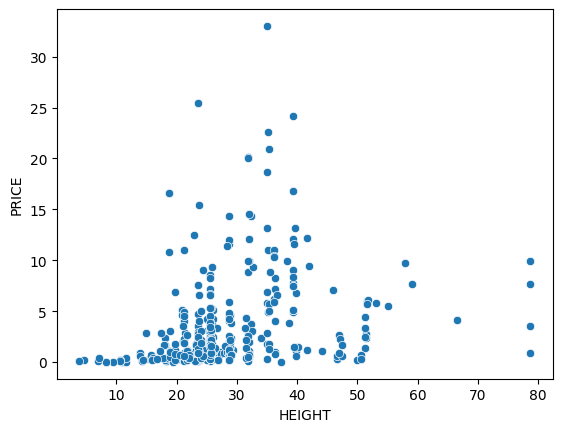

In [158]:
#display a scatterplot between height and price
sns.scatterplot(x=ml_monet['HEIGHT'], y=ml_monet['PRICE'])

I fitted a linear regression model using the values of height and price from the training dataset. 

In [159]:
#call linear regression model 
model2 = LinearRegression()
#slice the training data to only include the values of height, this is reshaped 
#and converted into a 2d array
height_train = x_train[:,1].reshape(-1,1)
#fit the linear regression model with the training data of height and price
model2.fit(height_train, y_train)

LinearRegression()

I predicted the corresponding y values using the linear regression model that I fitted. And then, I computed the rmse and the r-squared value. 

The r-square for the model that involved height is higher than the model that involved house_3. Also, the rmse for the modeled that involved height is also closer to zero compared to the model that involved house_3. This indicates that the height model is better at predicting price than house_3

In [163]:
#predict the values of the target variable
y_pred2 = model2.predict(x_test[:,1].reshape(-1,1))
#compute the mean squared error 
mse2 = mean_squared_error(y_test, y_pred2)
#find the square root of the mean square error to compute the rmse
rmse2 = np.sqrt(mse2)

#find the r-squared value
print("R-squared:{}".format(model2.score(x_test[:,1].reshape(-1,1), y_test)))

print("RMSE:{}".format(rmse2))


R-squared:0.16256378326346288
RMSE:2.9730841684239855


For visualization purposes I displayed a regression line along the scatterplot. 

<Axes: >

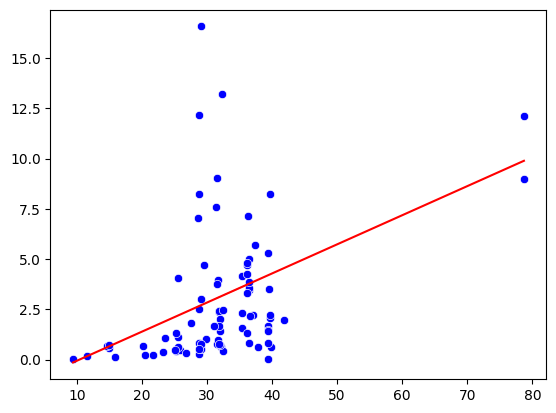

In [164]:
#display the regression line along the scatterplot
sns.scatterplot(x=x_test[:,1].reshape(-1), y = y_test, color = 'blue')
sns.lineplot(x=x_test[:,1].reshape(-1), y=y_pred2, color = 'red' )

I perform k-fold cross validation to validate, the model and see how well it performs based on different partitions of the data. 

In [166]:
#compute k fold cross validation for rmse 
num_fold = 10 

seed = 2

k_fold = KFold(n_splits=num_fold, random_state=seed, shuffle= True)

scoring = 'neg_root_mean_squared_error'

results2 = cross_val_score(model2, all_x[:,1].reshape(-1,1), y=y, scoring=scoring)
#find the average of all of the cross validation scores
cross_val_results2 = (results2.mean())

print("cross val rmse score:{}".format(cross_val_results2))

cross val rmse score:-3.997162549988513


The model 2 rmse decreased by about 1 value. But it still performed better than the first model. 

My last model will be a multivariate linear regression where the features are height and width. 
Before fitting the regression model, I decided to scale price, height and width since they were not in the same units. 

In [141]:
#scale price, height and width. then convert it into a separate dataframe
scale = StandardScaler()
scale_monet = scale.fit_transform(ml_monet[['PRICE', 'HEIGHT', 'WIDTH']])

scale_df = pd.DataFrame(scale_monet, columns=['PRICE','HEIGHT', 'WIDTH'])

Then I converted these scaled values into a np array, and assigned the values of height and width as predictors, and the values of price as target. 

Next, I conducted a train-test split, so we can assess the generalization of the model. 

In [142]:
#convert the scaled values into a np array
array_2 = scale_df.values
#slice to only include the scaled predictor values, height and width
x = array_2[:,1:]
#slice to only the target variable, which is price
y_2 = array_2[:,0]

In [143]:
#establish test size 
seed = 2

test_size = 0.20
#create a train test split 
x_train2,x_test2, y_train2, y_test2 = train_test_split(x,y_2, random_state=seed,
                                                   test_size=0.20)



I fitted a linear regression model using the values of height, width and price from the training dataset. 

In [144]:
#call linear regression model 
model3 = LinearRegression()
#fit the linear regression model with the training data 
model3.fit(x_train2, y_train2)



LinearRegression()

I predicted the corresponding y values using the multivariate linear regression model that I fitted. And then, I computed the rmse and the r-squared value. 

In [145]:
#predict the values of the target variable 
y_pred3 = model3.predict(x_test2)
#compute the mean square error 
mse3 = mean_squared_error(y_test2, y_pred3)
#compute the root mean square error by finding the square root of the mean
#square error
rmse3 = np.sqrt(mse3)
#calculate the r-square value
print("R-squared:{}".format(model3.score(x_test2, y_test2)))

print("RMSE:{}".format(rmse3))


R-squared:0.1011185874448366
RMSE:1.1256329015754152


This model had a low r-square value but it was higher than the other models. Also it had the lowest rmse value compared to the other models. This indicates that this model generalized more accurately in comparison to the other models. 

I perform k-fold cross validation to validate the model and see how well it performs based on different partitions of the data. 

In [146]:
#compute k fold cross validation for rmse 
num_fold = 10 

seed = 2

k_fold = KFold(n_splits=num_fold, random_state=seed, shuffle= True)

scoring = 'neg_root_mean_squared_error'

results3 = cross_val_score(model3, x, y=y_2, scoring=scoring)

#find the average of all of the cross validation scores
cross_val_results3 = (results3.mean())

print("cross val rmse score:{}".format(cross_val_results3))


cross val rmse score:-0.9216708979062682


The rmse score actually improved slightly because the value is closer to zero. 

In [147]:
print("RMSE for HOUSE_3:{:.3f}".format(rmse))
print()
print("RMSE for HEIGHT:{:.3f}".format(rmse2))
print()
print("RMSE for HEIGHT and WIDTH:{:.3f}".format(rmse3))

RMSE for HOUSE_3:3.213

RMSE for HEIGHT:73.421

RMSE for HEIGHT and WIDTH:1.126


In [148]:
print("AVG CV scores for NEG RMSE of HOUSE_!:{:.3f}".format(cross_val_results))
print()
print("AVG CV scores for NEG RMSE of HEIGHT:{:.3f}".format(cross_val_results2))
print()
print("AVG CV scores for NEG RMSE of WIDTH and HEIGHT:{:.3f}".format(cross_val_results3))

AVG CV scores for NEG RMSE of HOUSE_!:-4.242

AVG CV scores for NEG RMSE of HEIGHT:-3.997

AVG CV scores for NEG RMSE of WIDTH and HEIGHT:-0.922


According to the rmse values and the rmse values after k-fold cross validation, above, the multivariate model, which included width and height as the features generalized the most accurately compared to the rest of the models. 